# Numerical Differentiation

## Finite difference approximation

Given a function $f$ and three points $(x_{j-1},x_j,x_{j+1})$, we can define three kinds of differences to estimate the derivative at $x_j$, $f'(x_j)$:
- __Forward__ difference $f'_+(x_j)=\dfrac{f(x_{j+1})-f(x_{j})}{x_{j+1}-x_j}$, aka slope of line connecting $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$.
- __Backward__ difference $f'_-(x_j)=\dfrac{f(x_{j})-f(x_{j-1})}{x_{j}-x_{j-1}}$, aka slope of line connecting $(x_j,f(x_j))$ and $(x_{j-1},f(x_{j-1}))$.
- __Central__ difference $f'_C(x_j)=\dfrac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$, aka slope of line connecting $(x_{j+1},f(x_{j+1}))$ and $(x_{j-1},f(x_{j-1}))$.

The accuracy of __forward__ and __backward__ differences is $O(h)$, where $h$ is the spacing between the lattice points ${x_j}$. This comes from a straightforward Taylor expansion. For the forward difference we have $(h\equiv x_{j+1}-x_{j})$:

$f(x_{j+1})=f(x_j)+f'(x_j)h+f''(x_j)\dfrac{h^2}{2}+\dots\longrightarrow f'(x_j)=\dfrac{f(x_{j+1})-f(x_j)}{h}-h \dfrac{f''(x_j)}{2}+\dots=\dfrac{f(x_{j+1})-f(x_j)}{h}+O(h)$

For the __central__ difference, the accuracy is actually $O(h^2)$. In fact, subtracting Taylor expansions for $f(x_{j+1})$ and $f(x_{j-1})$ we get:

$f(x_{j+1})-f(x_{j-1})=2hf'(x_j)+\dfrac{2}{3!}h^3f'''(x_j)+\dots \longrightarrow f'(x_j)=\dfrac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}+O(h^2)$

In general, formulas that use symmetric points ($x_{j+1}$ and $x_{j-1}$ are symmetric around $x_j$) usually achieve better accuracy.

Summing/subtracting more points lets also obtain better accuracies. For example with 4 symmetric points one can reach accuracy up to $O(h^4)$.

Numpy has a function, `diff`, to compute differences between elements of an array. The strategy is to:
- Initialize a `numpy` `array` `x`, containing the points $x_j$. A good way to do so is using `np.arange`.
- Apply the function `f` to `x`
- `np.diff(f)` will return an array with the finite differences computed on the points in `x`.

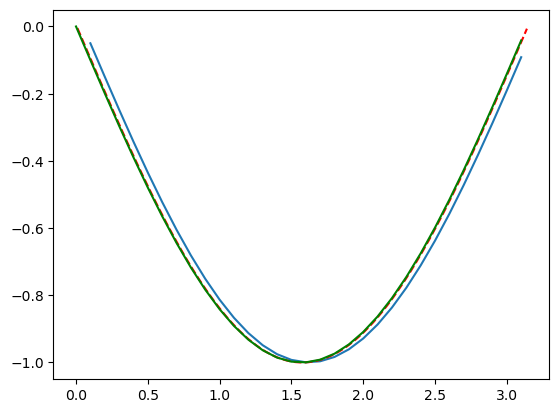

In [26]:
import numpy as np
import matplotlib.pyplot as plt

h=0.1
h2=0.01
x=np.arange(0,np.pi,h)
x_improved=np.arange(0,np.pi,h2)
f=np.cos(x)
f_improved=np.cos(x_improved)

forward_diff=np.diff(f)/h
forward_diff_improved=np.diff(f_improved)/h2
df=-np.sin(x)
plt.plot(x[1:],forward_diff) #skip first point of x as forward differences have 1 point less
plt.plot(x_improved[1:],forward_diff_improved,'--', c='r') #skip first point of x as forward differences have 1 point less
plt.plot(x,df,c='g')
plt.show()

You can clearly see how reducing lattice spacing improves precision by quite a lot!

The following code computes the numerical derivative of $\cos(x)$ using the forward difference formula for decreasing step sizes, $h$. It then plots the maximum error between the approximated derivative and the true derivative versus $h$ as shown in the generated figure.



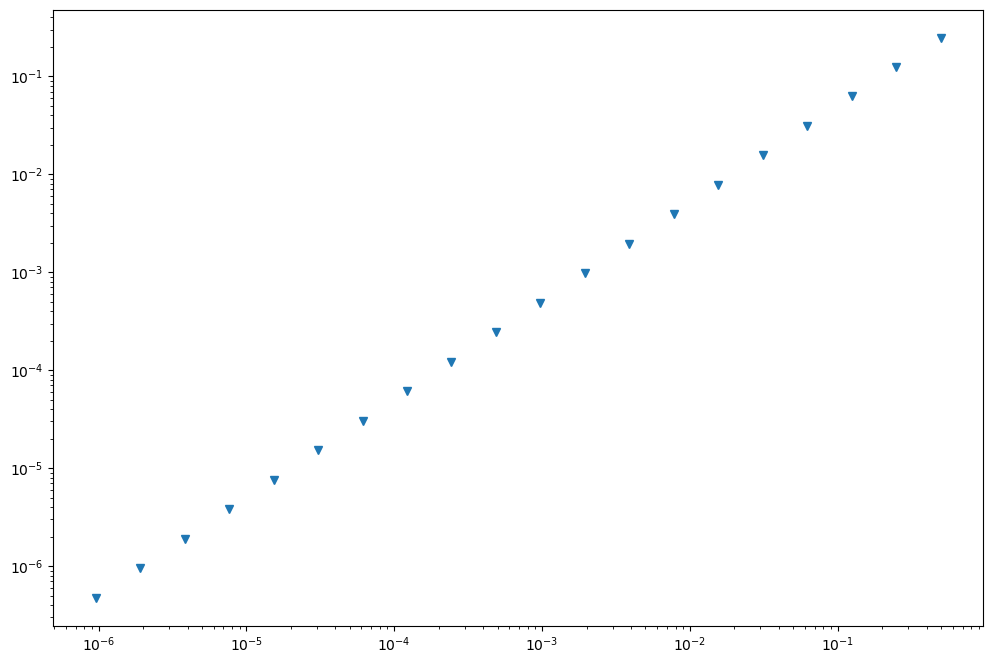

In [29]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

The slope of the line in log-log space is 1; therefore, the error is proportional to $h^1$, which means that, as expected, the forward difference formula is $O(h)$.

## Higher order derivatives

The same principles can be exploited to compute finite difference higher order derivatives. For example we have:

$f(x_{j-1})=f(x_j)+h f'(x_j)+\dfrac{h^2}{2}f''(x_j)-\dfrac{h^3}{3!}f'''(x_j)+O(h^4)$

$f(x_{j+1})=f(x_j)-h f'(x_j)+\dfrac{h^2}{2}f''(x_j)+\dfrac{h^3}{3!}f'''(x_j)+O(h^4)$

and so:

<center>$f(x_{j+1})+f(x_{j-1})=2f(x_j)+h^2f''(x_j)+O(h^4)\longrightarrow f''(x_j)=\dfrac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2}+O(h^2)$</center>

## Numerical differentiation with noise

Sometimes the data is corrupted by a noise, i.e. samplings $f(x_j)$ might be off. This can have repercussions on the finite difference calculations even if the samplings are not far off the "real values".

__Example__

Consider the model $f(x)=\cos(x)$, and assume that the samplings actually follow the law $f_{\epsilon}(x)=\cos(x)+\epsilon \sin(\omega x)$. If $\epsilon<<1$, the values of the two functions are in general very close.
However, their derivatives may be not as close. In fact:

$f'(x)=-\sin(x)$, while $f'_{\epsilon}(x)=-\sin(x)+\epsilon \omega \cos(\omega x)\longrightarrow$ if $\omega \epsilon \sim 1$ they're quite different.

So one should be a bit careful when estimating derivatives via finite difference if you have noisy data.

# Problems

1) Write a function 𝑚𝑦_𝑑𝑒𝑟_𝑐𝑎𝑙𝑐(𝑓,𝑎,𝑏,𝑁,𝑜𝑝𝑡𝑖𝑜𝑛), with the output as [𝑑𝑓,𝑋], where 𝑓 is a function object, 𝑎 and 𝑏 are scalars such that a < b, 𝑁 is an integer bigger than 10, and 𝑜𝑝𝑡𝑖𝑜𝑛 is the string 𝑓𝑜𝑟𝑤𝑎𝑟𝑑, 𝑏𝑎𝑐𝑘𝑤𝑎𝑟𝑑, or 𝑐𝑒𝑛𝑡𝑟𝑎𝑙. Let 𝑥 be an array starting at 𝑎, ending at 𝑏, containing 𝑁 evenly spaced elements, and let 𝑦 be the array 𝑓(𝑥). The output argument, 𝑑𝑓, should be the numerical derivatives computed for 𝑥 and 𝑦 according to the method defined by the input argument, 𝑜𝑝𝑡𝑖𝑜𝑛. The output argument 𝑋 should be an array the same size as 𝑑𝑓 containing the points in 𝑥 for which 𝑑𝑓 is valid. Specifically, the forward difference method “loses” the last point, the backward difference method loses the first point, and the central difference method loses the first and last points.

In [65]:
def my_num_diff(f,a,b,N,option):
    x=np.linspace(a,b,N)
    h=(a+b)/N
    fx=f(x)
    if option=='forward':
        df=np.diff(fx)/h
        return [df,x[:-1]]
    elif option=='backward':
        df=np.diff(fx)/h
        return [df,x[1:]]
    elif option=='central':
        diff=[]
        for i in range(len(fx)-2):
            diff.append(fx[i+2]-fx[i])
        diff=np.array(diff)
        df=diff/(2*h) #probably there's a more efficient way
        return [df,x[1:-1]]
    else:
        return 'wrong option'

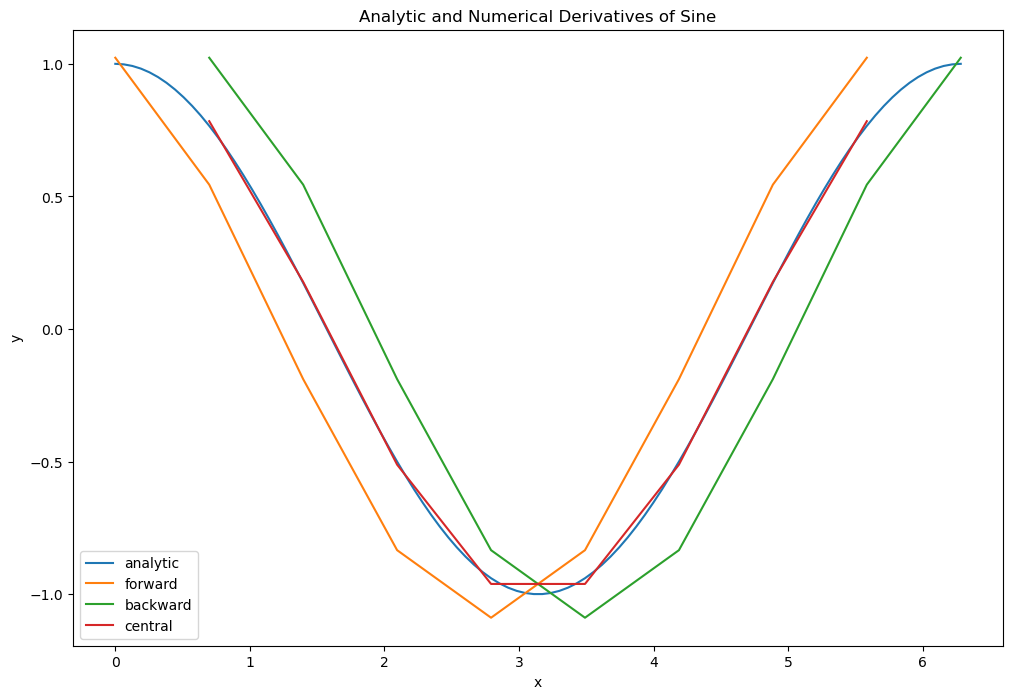

In [66]:
x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

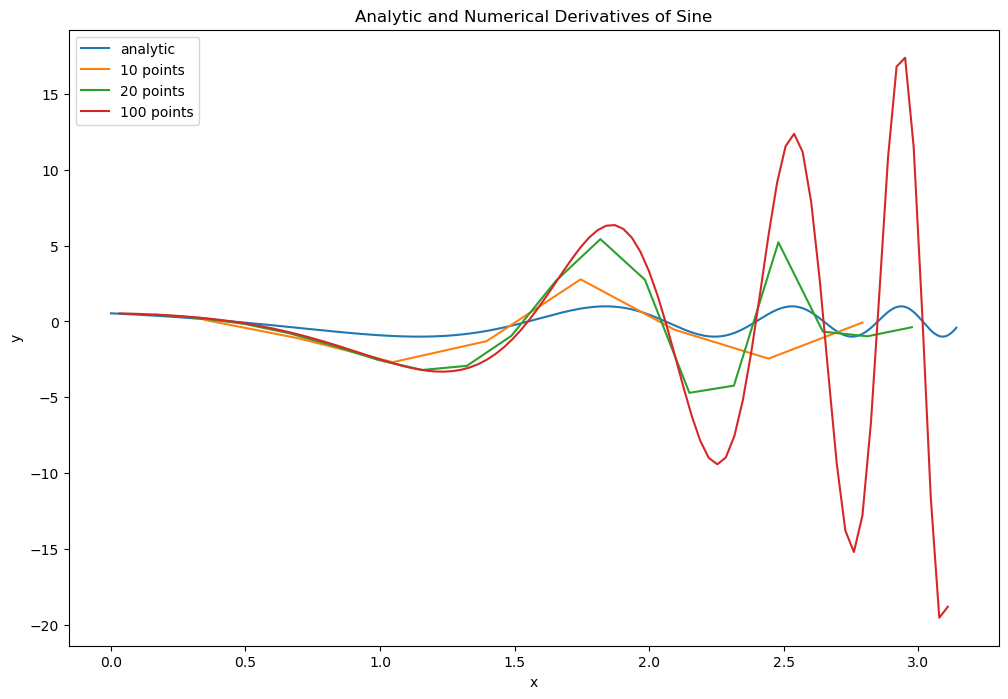

In [67]:
x = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(np.exp(x))
[dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
plt.plot(X10, dy10, label = '10 points')
plt.plot(X20, dy20, label = '20 points')
plt.plot(X100, dy100, label = '100 points')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2) Write a function 𝑚𝑦_𝑛𝑢𝑚_𝑑𝑖𝑓𝑓_𝑤_𝑠𝑚𝑜𝑜𝑡ℎ𝑖𝑛𝑔(𝑥,𝑦,𝑛), with the output [𝑑𝑦,𝑋],where 𝑥 and 𝑦 are 1D numpy array of the same length, and 𝑛 is a strictly positive scalar. The function should first create a vector of “smoothed” 𝑦 data points where 𝑦_𝑠𝑚𝑜𝑜𝑡ℎ[𝑖]=𝑛𝑝.𝑚𝑒𝑎𝑛(𝑦[𝑖−𝑛:𝑖+𝑛]). The function should then compute 𝑑𝑦, the derivative of the smoothed 𝑦-vector using the central difference method. The function should also output a 1D array 𝑋 that is the same size as 𝑑𝑦 and denotes the x-values for which 𝑑𝑦 is valid.

In [88]:
def my_num_diff_w_smoothing(x,y,n):
    y_smooth=[]
    for i in range(n,len(y)-n+1):
        y_smooth.append(np.mean(y[i-n:i+n+1]))
    diff=[]
    for i in range(len(y_smooth)-2):
        diff.append((y_smooth[i+2]-y_smooth[i])/(x[i+2]-x[i]))
    return [diff,x[n+1:-n]]

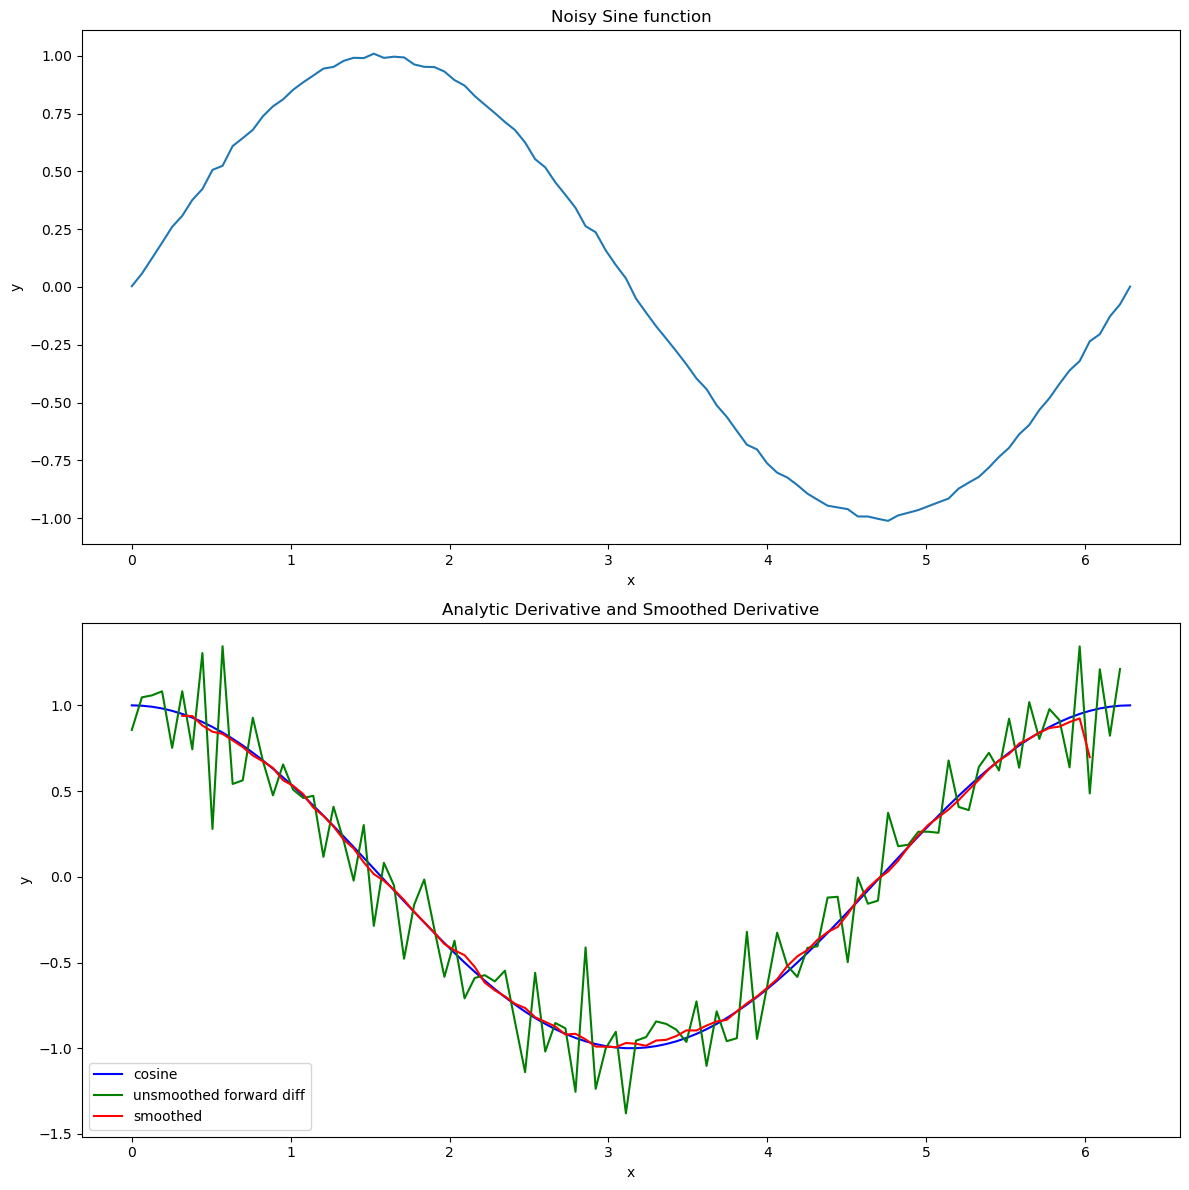

In [89]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#some problem at final point but fine otherwise